# Measuring the Speed of Light

In the late 1800s, Simon Newcomb performed a series of measurements of the speed of light. In this notebook, you will take his raw data and perform some simple analysis and visualization of this data using Pandas.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Raw data

Newcomb measured how long it took (in nanoseconds) for light to travel $7442$ meters. His raw measurements are reported as deviations from $24,800$ nanoseconds. Here is a file with the raw data. This comes from Stigler (1977).

In [2]:
offset = 24800 # add this to raw data to get times in nanoseconds
distance = 7442 # distance in meters traveled

In [3]:
%%writefile speed_of_light.txt
28 26 33 24 34 -44 27 16 40 -2
29 22 24 21 25 30 23 29 31 19
24 20 36 32 36 28 25 21 28 29
37 25 28 26 30 32 36 26 30 22
36 23 27 27 28 27 31 27 26 33
26 32 32 24 39 28 24 25 32 25
29 27 28 29 16 23

Overwriting speed_of_light.txt


## Reading the data

Read the raw data in as a Pandas `DataFrame`:

* Create a column named `raw` with integer valued deviations.
* Name the `DataFrame` `data`.

In [4]:
f = open('speed_of_light.txt','r') 

In [5]:
data = f.read()

In [6]:
data = data.split()

In [7]:
data = pd.Series(data,index=range(0,66),dtype='int')

In [8]:
data = pd.DataFrame(data,columns=['raw'])

In [9]:
data.head()

,raw
0,28
1,26
2,33
3,24
4,34


In [10]:
assert list(data.columns)==['raw']
assert len(data)==66
assert data.raw.dtype==np.dtype(int)

## Transforming the data

Create two new columns in the `DataFrame`:

* A column named `time` that has the times in nanoseconds.
* A column named `speed` that has the speeds in meters/nanosecond.

In [11]:
data['time'] = data + 24800

In [12]:
data['time'].convert_objects(convert_numeric=True)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


0     24828
1     24826
2     24833
3     24824
4     24834
5     24756
6     24827
7     24816
8     24840
9     24798
10    24829
11    24822
12    24824
13    24821
14    24825
15    24830
16    24823
17    24829
18    24831
19    24819
20    24824
21    24820
22    24836
23    24832
24    24836
25    24828
26    24825
27    24821
28    24828
29    24829
      ...  
36    24836
37    24826
38    24830
39    24822
40    24836
41    24823
42    24827
43    24827
44    24828
45    24827
46    24831
47    24827
48    24826
49    24833
50    24826
51    24832
52    24832
53    24824
54    24839
55    24828
56    24824
57    24825
58    24832
59    24825
60    24829
61    24827
62    24828
63    24829
64    24816
65    24823
Name: time, dtype: int64

In [13]:
data['speed'] = 7442/data['time']

In [14]:
data.head()

,raw,time,speed
0,28,24828,0.299742
1,26,24826,0.299766
2,33,24833,0.299682
3,24,24824,0.299791
4,34,24834,0.299670


In [15]:
assert list(data.columns)==['raw', 'time', 'speed']
assert abs(data.time.mean()-24826.0)<1.0
assert abs(data.speed.mean()-0.3)<0.1
assert data.time.dtype==np.dtype(int)
assert data.speed.dtype==np.dtype(float)

## Visualization and outlier removal

Make an appropriately labeled (with units) `distplot` of the `time` data.

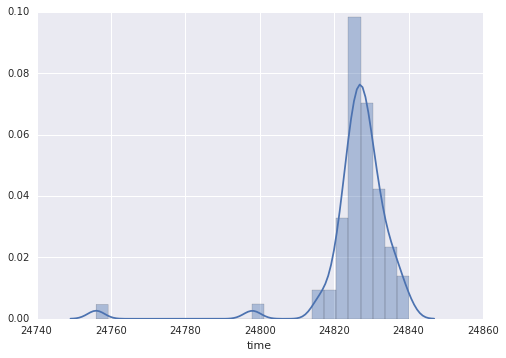

In [16]:
sns.distplot(data.time)

Make an appropriately labeled (with units) of the speed data:

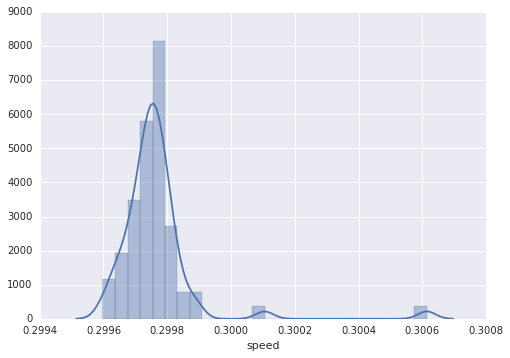

In [17]:
sns.distplot(data.speed)

Create a new `DataFrame` named `data2` that has the outliers removed:

In [ ]:
data2 = data[data['time']>24800]

In [ ]:
data2['speed'] = data[data['speed']<.3]

Make an appropriately labeled (with units) of the speed data with outliers removed:

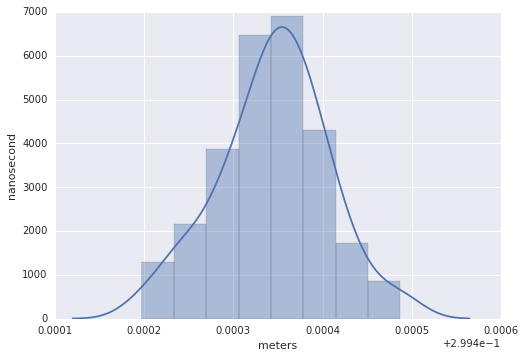

In [20]:
sns.distplot(data2.speed)
plt.xlabel('meters')
plt.ylabel('nanosecond')
plt.show()

## Bootstrapped mean

Here is the actual speed of light in meters/nanoseconds:

In [21]:
actual = 299792458.0*1e-9

Compute the (`n=400`) bootstrapped distribution of the mean speed of light as a NumPy array named `means`. Use the `sample` method of the Pandas `Series/DataFrame` object to do this.

In [25]:
mean = [(np.random.choice(data['speed'],len(data['speed']))).mean() for n in range(400)]

Make an appropriately labeled `distplot` of the mean distribution that includes a vertical line where the actual speed of light is. Print the mean and 95% confidence interval of this distribution. Does this experiment agree with the actual speed of light?

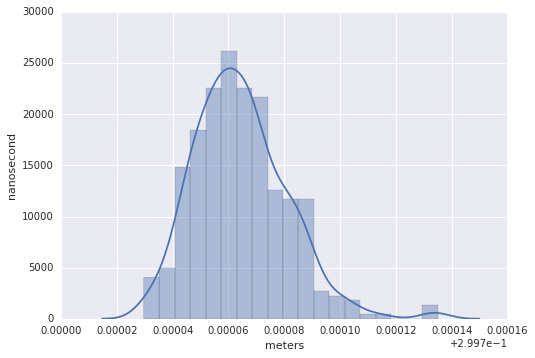

In [37]:
sns.distplot(mean)
plt.xlabel('meters')
plt.ylabel('nanosecond')
plt.show()